<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/Tensorflow_2_0_2D_CNN_CIFAC_10_Image_Classifier/Tensorflow_2_0_2D_CNN_CIFAC_10_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is CNN**

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics

**Important Terms of CNN**
 - Convolutional Layer
 - Activation Function
 - Filter Size (Each filter extract different part of the image)
 - Stride Size
 - Max pooling
 - Flattening and Dense Layer

# **Download Data and Model Building**

In [ ]:
!pip install tensorflow-gpu==2.0.0

In [ ]:
!pip install mlxtend==0.17.0

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [ ]:
print(tf.__version__)

2.0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
classes_name = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [ ]:
x_train.max()

255

Since Neural Network understand the data between 0 to 1. Brininging our data in the range 0 to 1. To do this we will simply divide the given data with the maximum value.

In [ ]:
x_train = x_train/x_train.max()
x_test = x_test/x_train.max()

In [ ]:
x_train.shape, x_test.shape

# x_train gives (50000, 32, 32, 3) - 50000 data, 32 x 32 bits, height and width, 3 is rgb, color.
# x_test gives (10000, 32, 32, 3) - 10000 data, 32 x 32 bits, height and width, 3 is rgb, color.

((50000, 32, 32, 3), (10000, 32, 32, 3))

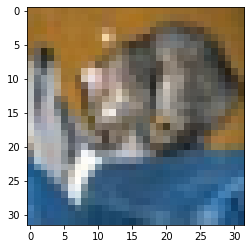

In [ ]:
plt.imshow(x_test[0].astype("uint8")) 

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

**# Build CNN Model**

In [ ]:
model = Sequential()
# Only first layer needs input size
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=[32, 32, 3])) # Same keeps the original data padding

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding="valid")) # Valid tries to reduce the dimension

# Dropout helps to avid the overfitting of the mode. Here we are dropping 50% of the input at this layer.
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))

#Output layer. Unit is the size of the different output. Here we have 10 different outcomes.
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### **Compile the Model**

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

### **Fitting the Model**

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

NameError: ignored

In the above training we can see the validation accuracy is lesser than the accuracy. This means our model is **overfitting**. Also, if the validation accuracy is higher than the accuracy its called **underfitting**.

So lets look at the point where it started overfillting by plotting the graph.

In [ ]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
epoch_range = range(1, 11) # No of Epochs used to train. 11 - 1 = 10
plt.plot(epoch_range, history.history["sparse_categorical_accuracy"])
plt.plot(epoch_range, history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

In [ ]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

# **Plot Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict_classes(x_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
mat = confusion_matrix(y_test, y_pred)

In [ ]:
mat

In [ ]:
plot_confusion_matrix(mat, figsize=(9, 9), class_names=classes_name, show_normed=True)